In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data=pd.read_csv("cleaned_data_00.csv")
data.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [4]:
X=data.drop("target",axis=1)
X.shape
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13
1,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10
2,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13
3,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9
4,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10
5833,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7
5834,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11
5835,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11


In [5]:
Y=data["target"]
Y=Y.values

In [6]:
data=data.sample(frac=1)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
1305,0.728,0.974,4,-2.261,0,0.0665,0.103000,0.000532,0.1750,0.965,79.526,235213,4,102.04710,9,1
1895,0.424,0.893,0,-4.769,1,0.0405,0.000005,0.268000,0.1260,0.166,107.990,381160,4,26.75281,11,0
1405,0.469,0.803,7,-3.673,0,0.0745,0.453000,0.000009,0.3570,0.581,83.395,214013,4,63.11852,10,0
3179,0.559,0.733,2,-5.659,0,0.1710,0.314000,0.000000,0.2840,0.611,145.115,316053,4,54.46823,10,1
3332,0.486,0.763,0,-5.524,1,0.0277,0.546000,0.000855,0.0837,0.539,111.940,149107,4,72.49690,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.333,0.928,11,-6.283,1,0.0687,0.061800,0.000000,0.8800,0.597,148.483,180627,4,22.42649,13,0
1190,0.373,0.916,7,-6.456,1,0.0773,0.026600,0.000000,0.9510,0.476,172.036,237133,4,15.67954,12,0
3364,0.495,0.387,9,-7.531,1,0.0256,0.617000,0.000004,0.3420,0.291,78.418,249227,4,60.70542,11,1
2157,0.842,0.656,5,-3.189,0,0.1070,0.160000,0.000000,0.0626,0.950,102.794,207133,4,38.12443,10,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [8]:
scaled_X

array([[ 0.18606318, -0.94033877, -0.35851628, ...,  0.21274961,
        -0.48813304,  0.33632289],
       [ 0.84889714,  0.66870603,  1.32481354, ...,  0.21274961,
         0.03628762, -0.18338679],
       [-2.00234099,  0.59308512,  1.04425857, ...,  0.21274961,
         1.21126404,  0.33632289],
       ...,
       [-1.29216175, -2.59433599, -0.91962622, ...,  0.21274961,
        -0.16064657, -0.01015023],
       [-0.80292716, -0.39418779,  0.48314863, ...,  0.21274961,
        -0.04610346, -0.01015023],
       [-0.01909971,  0.18977363, -1.48073616, ...,  0.21274961,
        -0.78046761,  0.33632289]])

In [9]:
from sklearn.model_selection import train_test_split
#train-test split in 90%-10%
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, 
                                test_size=0.1, random_state=1)

In [10]:
#Train-Validation split 90%-10%
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, 
                                test_size=(1/9), random_state=1)
#1/9 of 90% is 10% as we are using train if we use Scaled X then we use test size as 0.1

In [11]:
x_train.shape,x_test.shape,x_val.shape

((4669, 15), (584, 15), (584, 15))

In [12]:
nn = 200 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

In [14]:
from tensorflow import keras
model_00 = keras.Sequential([

keras.layers.Flatten(), #to flaten our data for better results 
keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer

keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    
    ])

In [15]:
model_00.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [16]:
#fitting the model 
model_fit = model_00.fit(x_train, y_train, epochs=20,
                         validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
47/47 [==============================] - 1s 26ms/step - loss: 0.4465 - accuracy: 0.7993 - val_loss: 0.3637 - val_accuracy: 0.8356
Epoch 2/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3660 - accuracy: 0.8434 - val_loss: 0.3450 - val_accuracy: 0.8545
Epoch 3/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3514 - accuracy: 0.8486 - val_loss: 0.3198 - val_accuracy: 0.8613
Epoch 4/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3350 - accuracy: 0.8599 - val_loss: 0.3162 - val_accuracy: 0.8630
Epoch 5/20
47/47 [==============================] - 1s 11ms/step - loss: 0.3277 - accuracy: 0.8576 - val_loss: 0.3240 - val_accuracy: 0.8562
Epoch 6/20
47/47 [==============================] - 1s 12ms/step - loss: 0.3111 - accuracy: 0.8655 - val_loss: 0.3244 - val_accuracy: 0.8613
Epoch 7/20
47/47 [==============================] - 1s 13ms/step - loss: 0.3026 - accuracy: 0.8732 - val_loss: 0.3211 - val_accuracy: 0.8579
Epoch 8/20
47

In [17]:
predictions=model_00.predict(x_test)

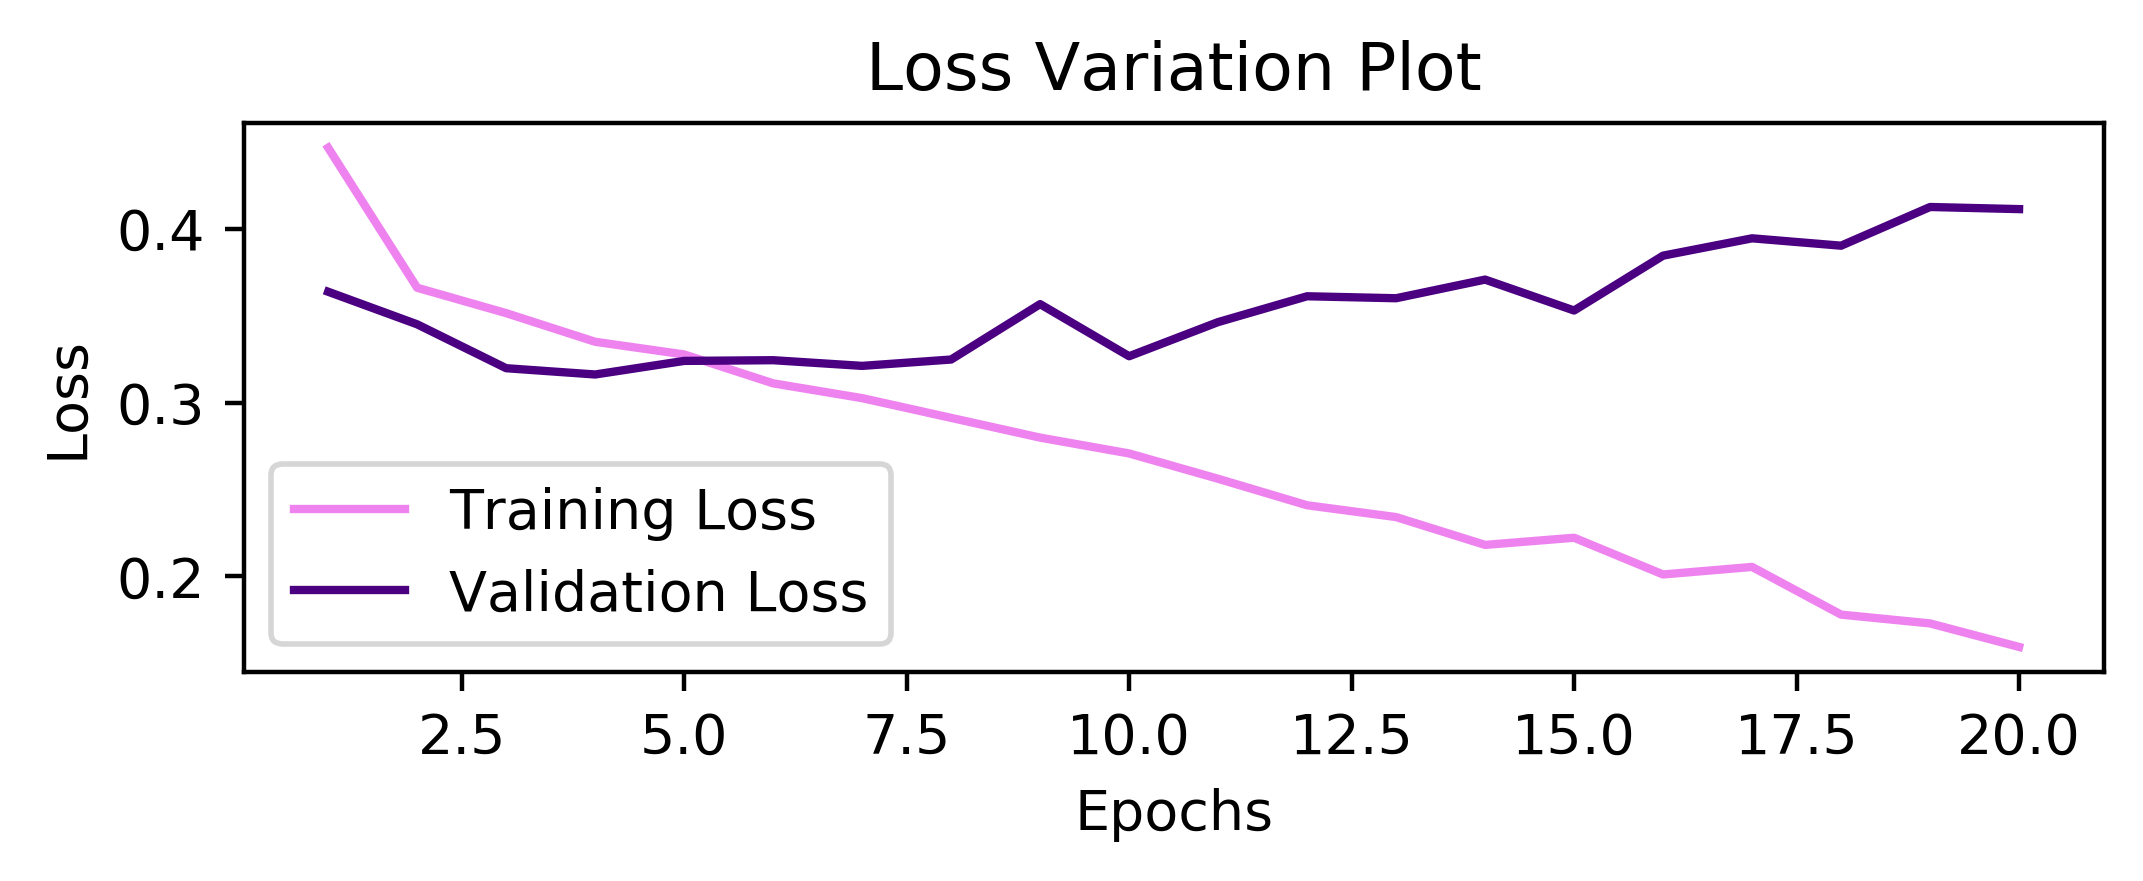

In [19]:
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

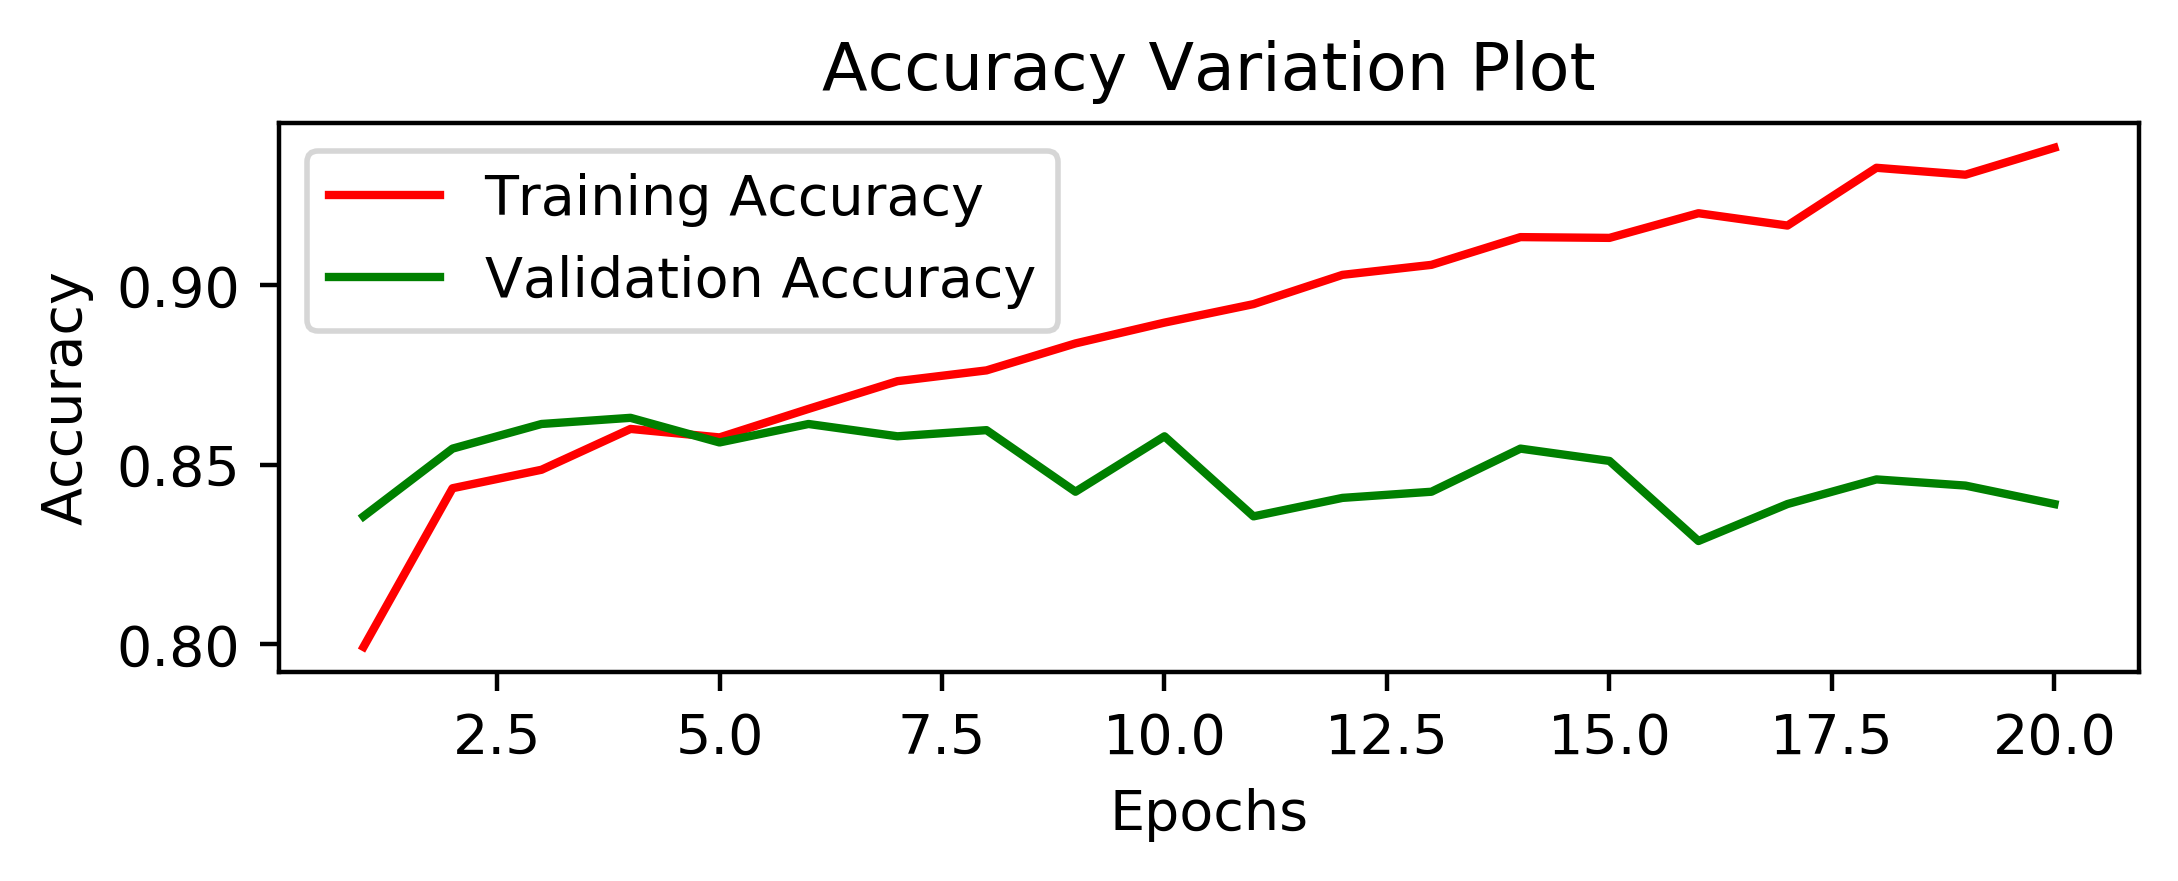

In [20]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [21]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[9.6994067e-05 9.9990296e-01]
Predicted: 1
Original: 1


In [22]:
model_00.save('Trained_model_00')    #saved as protobuf (.pb)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Trained_model_00\assets


In [23]:
model_00.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  3200      
_________________________________________________________________
dense_1 (Dense)              multiple                  40200     
_________________________________________________________________
dense_2 (Dense)              multiple                  40200     
_________________________________________________________________
dense_3 (Dense)              multiple                  402       
Total params: 84,002
Trainable params: 84,002
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = tf.keras.models.load_model('Trained_model_00')
print(x_test[1])

[-0.03488147 -0.34797502 -0.35851628  0.31517     0.74156614  1.89139119
 -0.32151651 -0.50248917  0.077167    0.34576794 -1.15494323 -0.2094291
  0.21274961  0.02555893 -0.01015023]


In [25]:
print(x_test[1].reshape(1,-1))

[[-0.03488147 -0.34797502 -0.35851628  0.31517     0.74156614  1.89139119
  -0.32151651 -0.50248917  0.077167    0.34576794 -1.15494323 -0.2094291
   0.21274961  0.02555893 -0.01015023]]


In [27]:
v=model.predict(x_test[1].reshape(1,-1))
print(v)

[[0.04508877 0.95491123]]
